import套件

In [90]:
import pandas as pd
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn import tree

讀取資料

In [91]:
df = pd.read_csv(f'character-deaths.csv')
df.head()

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0


死亡年 填0轉1

In [92]:
death_set = set(df[df['Death Year'].notna()]['Death Year'])
death_dict = dict.fromkeys(death_set,1)
death_dict

{297.0: 1, 298.0: 1, 299.0: 1, 300.0: 1}

In [93]:
df['Death Year'] = df['Death Year'].map(death_dict).fillna(0).astype('int')
df['Book Intro Chapter'] = df['Book Intro Chapter'].fillna(0)

In [94]:
df.head()

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,0,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,1,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,0,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,1,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,0,NaN,NaN,0.0,1,1,0,0,1,0,0


做OHE並且concat起來

In [95]:
df = pd.concat([df,pd.get_dummies(df['Allegiances'])],axis=1)
df.head(5)

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,...,House Tyrell,Lannister,Martell,Night's Watch,None,Stark,Targaryen,Tully,Tyrell,Wildling
0,Addam Marbrand,Lannister,0,NaN,NaN,56.0,1,1,1,1,...,0,1,0,0,0,0,0,0,0,0
1,Aegon Frey (Jinglebell),None,1,3.0,51.0,49.0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,Aegon Targaryen,House Targaryen,0,NaN,NaN,5.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Adrack Humble,House Greyjoy,1,5.0,20.0,20.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Aemon Costayne,Lannister,0,NaN,NaN,0.0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0


確定一下分類無誤

In [96]:
print(df[df['Allegiances']=='Lannister'][['Allegiances','Lannister']].head(5))
set(df[df['Allegiances']=='Lannister']['Lannister'])

   Allegiances  Lannister
0    Lannister          1
4    Lannister          1
27   Lannister          1
38   Lannister          1
45   Lannister          1


{1}

我不知道隨機取是什麼意思，我就用shuffle

好像有train_test_split可以用

In [97]:
shuffle_df = shuffle(df)
train_df = shuffle_df[0:int(len(df)*0.75)]
test_df = shuffle_df[int(len(df)*0.75)+1:]

In [98]:
train_df.drop(labels=['Death Year','Allegiances','Name','Book of Death','Death Chapter'],axis=1)

,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD,Arryn,Baratheon,...,House Tyrell,Lannister,Martell,Night's Watch,None,Stark,Targaryen,Tully,Tyrell,Wildling
50,6.0,1,0,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
546,59.0,1,1,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
123,41.0,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
720,14.0,1,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
210,19.0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,16.0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
735,14.0,1,1,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
760,19.0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
553,31.0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


標註label與確認有無NaN

In [99]:
X = train_df.drop(labels=['Death Year','Allegiances','Name','Book of Death','Death Chapter'],axis=1)
Y = train_df['Death Year']

In [100]:
X.describe()

,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD,Arryn,Baratheon,...,House Tyrell,Lannister,Martell,Night's Watch,None,Stark,Targaryen,Tully,Tyrell,Wildling
count,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.00000,687.000000,687.000000,687.000000,...,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000
mean,28.921397,0.834061,0.468705,0.263464,0.346434,0.435226,0.27802,0.298399,0.026201,0.055313,...,0.014556,0.084425,0.029112,0.131004,0.291121,0.074236,0.018923,0.026201,0.013100,0.043668
std,20.250896,0.372297,0.499383,0.440833,0.476180,0.496148,0.44835,0.457889,0.159849,0.228757,...,0.119854,0.278227,0.168243,0.337651,0.454610,0.262345,0.136352,0.159849,0.113788,0.204505
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,28.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,43.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,78.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [101]:
X[X['Book Intro Chapter'].isna()]

,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD,Arryn,Baratheon,...,House Tyrell,Lannister,Martell,Night's Watch,None,Stark,Targaryen,Tully,Tyrell,Wildling


長樹，限制深度在4避免畫不出圖

In [102]:
clf = tree.DecisionTreeClassifier(max_depth=4)
clf = clf.fit(X, Y)

測試集資料處理

In [103]:
Xp = test_df.drop(labels=['Death Year','Allegiances','Name','Book of Death','Death Chapter'],axis=1)
Yp = test_df['Death Year']

In [104]:
clf.predict(Xp)

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1])

In [105]:
print(len(clf.predict(Xp)),len(Yp))

229 229


In [106]:
test_label = Yp.reset_index()['Death Year']

In [107]:
result = pd.concat([pd.DataFrame(test_label),pd.DataFrame(clf.predict(Xp))],axis=1)
result.head(5)

,Death Year,0
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1


In [108]:
result = result.rename(columns={'Death Year':'Death',0:'Predict'})
result.head(5)

,Death,Predict
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1


手算acc

In [109]:
counter = 0
for i in range(len(result)):
    if result['Death'][i]==result['Predict'][i]:
        counter+=1
counter/len(result)

0.6943231441048034

畫圖

In [110]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

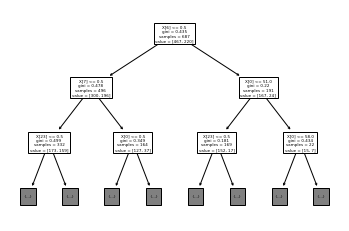

In [111]:
plot_tree(clf,max_depth=2)
plt.show()

In [112]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [113]:
y_pred = result['Predict']
y_true = result['Death']
accuracy_score(y_true, y_pred)

0.6943231441048034

In [114]:
confusion_matrix(y_true, y_pred)

array([[102,  42],
       [ 28,  57]], dtype=int64)

In [115]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.71      0.74       144
           1       0.58      0.67      0.62        85

    accuracy                           0.69       229
   macro avg       0.68      0.69      0.68       229
weighted avg       0.71      0.69      0.70       229



圖片輸出

In [116]:
X.columns

Index(['Book Intro Chapter', 'Gender', 'Nobility', 'GoT', 'CoK', 'SoS', 'FfC',
       'DwD', 'Arryn', 'Baratheon', 'Greyjoy', 'House Arryn',
       'House Baratheon', 'House Greyjoy', 'House Lannister', 'House Martell',
       'House Stark', 'House Targaryen', 'House Tully', 'House Tyrell',
       'Lannister', 'Martell', 'Night's Watch', 'None', 'Stark', 'Targaryen',
       'Tully', 'Tyrell', 'Wildling'],
      dtype='object')

In [117]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=X.columns) 
graph = graphviz.Source(dot_data) 
graph.render("hw1") 

'hw1.pdf'